In [1]:
## Import basic libraries to handle data 
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data','MNIST.npy'))
datay = np.load(join('data','Label.npy'))
print(datax.shape)
print(datay.shape)

(60000, 28, 28)
(60000,)


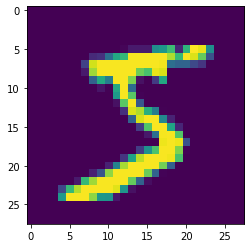

In [3]:
# 원본 데이터 확인
plt.imshow(datax[0])

In [4]:
datax_reshape = datax.reshape([60000, 28*28])
datax_reshape_norm = datax_reshape/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_reshape_norm), np.min(datax_reshape_norm)))

최대 : 1.0, 최소 : 0.0


In [5]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_reshape_norm, datay_onehot, test_size=0.3, random_state=111)

## Keras로 Deep MLP 만들기
## Sequential API

In [7]:
input_shape = (784,)

mlp_model = models.Sequential()
mlp_model.add(layers.Dense(units = 1000, activation = 'relu', input_shape=input_shape))
mlp_model.add(layers.Dense(units = 2000, activation = 'relu'))
mlp_model.add(layers.Dense(units = 1000, activation = 'relu'))
mlp_model.add(layers.Dense(units = 10, activation = 'softmax'))

mlp_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [8]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              785000    
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10010     
Total params: 4,798,010
Trainable params: 4,798,010
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = mlp_model.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=512, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 30us/sample - loss: 0.2977 - accuracy: 0.9069 - val_loss: 0.1512 - val_accuracy: 0.9554
Epoch 2/50
42000/42000 [==============================] - 1s 16us/sample - loss: 0.0954 - accuracy: 0.9693 - val_loss: 0.1154 - val_accuracy: 0.9659
Epoch 3/50
42000/42000 [==============================] - 1s 16us/sample - loss: 0.0592 - accuracy: 0.9805 - val_loss: 0.0943 - val_accuracy: 0.9714
Epoch 4/50
42000/42000 [==============================] - 1s 15us/sample - loss: 0.0322 - accuracy: 0.9903 - val_loss: 0.0744 - val_accuracy: 0.9778
Epoch 5/50
42000/42000 [==============================] - 1s 16us/sample - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0976 - val_accuracy: 0.9758
Epoch 6/50
42000/42000 [==============================] - 1s 15us/sample - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.1036 - val_accuracy: 0.9750
Epoch 7/50
42000/42000 [==============================] 

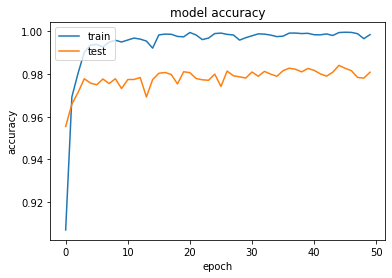

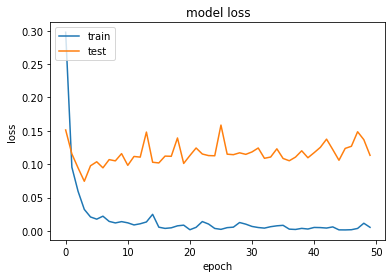

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Functional API 사용

In [11]:
input_shape = (784,)

visible = layers.Input(shape=input_shape)
hidden1 = layers.Dense(1000, activation='relu')(visible)
hidden2 = layers.Dense(2000, activation='relu')(hidden1)
hidden3 = layers.Dense(1000, activation='relu')(hidden2)
output = layers.Dense(10, activation='softmax')(hidden3)

mlp_function = models.Model(visible, output)

mlp_function.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 4,798,010
Trainable params: 4,798,010
Non-trainable params: 0
_________________________________________________________________


In [12]:
mlp_function.compile(optimizer='RMSprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
history = mlp_function.fit(trnx, trny, validation_data = [tstx, tsty], batch_size=512, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5068 - accuracy: 0.8555 - val_loss: 0.1973 - val_accuracy: 0.9383
Epoch 2/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.1450 - accuracy: 0.9555 - val_loss: 0.1784 - val_accuracy: 0.9519
Epoch 3/50
42000/42000 [==============================] - 1s 19us/sample - loss: 0.0863 - accuracy: 0.9740 - val_loss: 0.2602 - val_accuracy: 0.9390
Epoch 4/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.0586 - accuracy: 0.9824 - val_loss: 0.0828 - val_accuracy: 0.9763
Epoch 5/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.1430 - val_accuracy: 0.9649
Epoch 6/50
42000/42000 [==============================] - 1s 18us/sample - loss: 0.0425 - accuracy: 0.9884 - val_loss: 0.1082 - val_accuracy: 0.9759
Epoch 7/50
42000/42000 [==============================] 

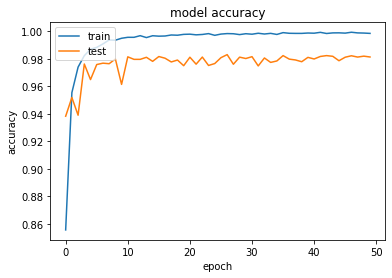

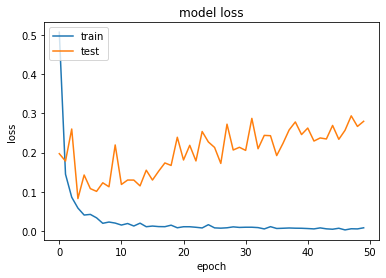

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Keras로 CNN 만들기
## Sequential API

In [14]:
input_shape = (28,28,1)

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16, (2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(32, (2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 128, activation = "relu"))
cnn_model.add(layers.Dense(units = 10, activation =  "softmax"))

cnn_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [15]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)       

In [16]:
trnx_reshape = trnx.reshape(-1,28,28,1)
tstx_reshape = tstx.reshape(-1,28,28,1)
print(trnx_reshape.shape)

(42000, 28, 28, 1)


In [17]:
history = cnn_model.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=512, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 57us/sample - loss: 0.5062 - accuracy: 0.8592 - val_loss: 1.9072 - val_accuracy: 0.3786
Epoch 2/50
42000/42000 [==============================] - 1s 23us/sample - loss: 0.1210 - accuracy: 0.9640 - val_loss: 1.8617 - val_accuracy: 0.3454
Epoch 3/50
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0876 - accuracy: 0.9729 - val_loss: 1.3375 - val_accuracy: 0.5349
Epoch 4/50
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0688 - accuracy: 0.9788 - val_loss: 0.6570 - val_accuracy: 0.8152
Epoch 5/50
42000/42000 [==============================] - 1s 24us/sample - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.2481 - val_accuracy: 0.9379
Epoch 6/50
42000/42000 [==============================] - 1s 23us/sample - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.1047 - val_accuracy: 0.9731
Epoch 7/50
42000/42000 [==============================] 

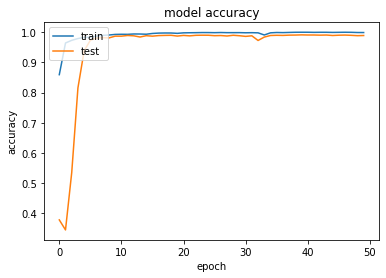

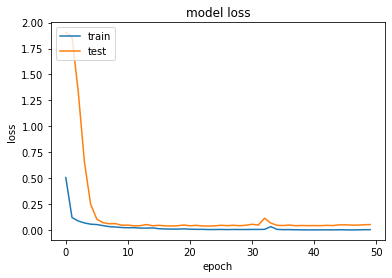

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Functional API

In [19]:
input_shape = (28,28,1)

input_tensor = layers.Input(shape = input_shape)

conv1_1 = layers.Conv2D(16, (2,2), padding='same')(input_tensor)
conv1_2 = layers.BatchNormalization()(conv1_1)
conv1_3 = layers.Activation("relu")(conv1_2)
conv1_4 = layers.MaxPooling2D((2,2))(conv1_3)

conv2_1 = layers.Conv2D(32, (2,2), padding='same')(conv1_4)
conv2_2 = layers.BatchNormalization()(conv2_1)
conv2_3 = layers.Activation("relu")(conv2_2)
conv2_4 = layers.Dropout(0.2)(conv2_3)
conv2_5 = layers.MaxPooling2D((2,2))(conv2_4)

conv3_1 = layers.Conv2D(64, (2,2), padding='same')(conv2_5)
conv3_2 = layers.BatchNormalization()(conv3_1)
conv3_3 = layers.Activation("relu")(conv3_2)
conv3_4 = layers.Dropout(0.2)(conv3_3)

flatted = layers.Flatten()(conv3_4)

dense1 = layers.Dense(128, activation="relu")(flatted)
dense2 = layers.Dense(64, activation="relu")(dense1)
output_class = layers.Dense(10, activation="softmax")(dense2)

cnn_fmodel = models.Model(input_tensor, output_class)
cnn_fmodel.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
cnn_fmodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 16)        80        
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 32)        128 

In [21]:
history = cnn_fmodel.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size=512, epochs=50)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 2s 50us/sample - loss: 0.3899 - accuracy: 0.8779 - val_loss: 3.8630 - val_accuracy: 0.1135
Epoch 2/50
42000/42000 [==============================] - 1s 27us/sample - loss: 0.0938 - accuracy: 0.9715 - val_loss: 5.0911 - val_accuracy: 0.1135
Epoch 3/50
42000/42000 [==============================] - 1s 29us/sample - loss: 0.0722 - accuracy: 0.9773 - val_loss: 4.4947 - val_accuracy: 0.1135
Epoch 4/50
42000/42000 [==============================] - 1s 28us/sample - loss: 0.0549 - accuracy: 0.9823 - val_loss: 2.3440 - val_accuracy: 0.2716
Epoch 5/50
42000/42000 [==============================] - 1s 27us/sample - loss: 0.0466 - accuracy: 0.9848 - val_loss: 1.2686 - val_accuracy: 0.5743
Epoch 6/50
42000/42000 [==============================] - 1s 27us/sample - loss: 0.0386 - accuracy: 0.9877 - val_loss: 0.3979 - val_accuracy: 0.8704
Epoch 7/50
42000/42000 [==============================] 

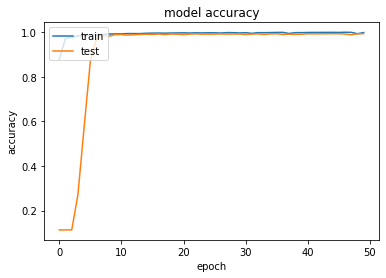

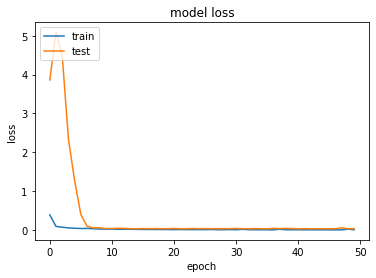

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()